In [ ]:
import pandas as pd

df = pd.read_csv("Students Performance .csv")
print(df.columns)


Index(['Student_ID', 'Student_Age', 'Sex', 'High_School_Type', 'Scholarship',
       'Additional_Work', 'Sports_activity', 'Transportation',
       'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
       'Listening_in_Class', 'Project_work', 'Grade'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
print("Loading dataset 'Students Performance .csv'...")
df = pd.read_csv("Students Performance .csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("Dataset loaded successfully!")
print("\nColumn names:")
print(df.columns)

# -------------------------------
# Clean attendance column
# -------------------------------
df["attendance"] = (
    df["attendance"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .str.strip()
)

df["attendance"] = pd.to_numeric(df["attendance"], errors="coerce")
df.dropna(subset=["attendance"], inplace=True)

print("\nCleaned attendance values:")
print(df["attendance"])

# -------------------------------
# Create target variable
# -------------------------------
def performance_level(att):
    if att <= 75:
        return "High"
    elif att >= 45:
        return "Medium"
    else:
        return "Average"

df["performance_level"] = df["attendance"].apply(performance_level)

# Encode target
le_target = LabelEncoder()
df["performance_enc"] = le_target.fit_transform(df["performance_level"])

# Features and target
X = df[["attendance"]]
y = df["performance_enc"]

print(f"\nTotal samples after cleaning: {len(df)}")

# -------------------------------
# Handle small dataset safely
# -------------------------------
model = RandomForestClassifier(random_state=42)

if len(df) < 2:
    print("\n⚠️ Only one sample available.")
    print("Training model on full dataset without train-test split.")
    model.fit(X, y)
else:
    print("\nSplitting dataset...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nModel training completed successfully.")

# -------------------------------
# Prediction function
# -------------------------------
def predict_student_performance():
    attendance = float(input("\nEnter Attendance (%): "))
    pred_encoded = model.predict([[attendance]])[0]
    result = le_target.inverse_transform([pred_encoded])[0]
    print(f"Predicted Student Performance Level: {result}")

# Run prediction
if __name__ == "__main__":
    predict_student_performance()

Loading dataset 'Students Performance .csv'...
Dataset loaded successfully!

Column names:
Index(['student_id', 'student_age', 'sex', 'high_school_type', 'scholarship',
       'additional_work', 'sports_activity', 'transportation',
       'weekly_study_hours', 'attendance', 'reading', 'notes',
       'listening_in_class', 'project_work', 'grade'],
      dtype='object')

Cleaned attendance values:
112    3.0
Name: attendance, dtype: float64

Total samples after cleaning: 1

⚠️ Only one sample available.
Training model on full dataset without train-test split.

Model training completed successfully.

Enter Attendance (%): 0
Predicted Student Performance Level: High


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# -------------------------------
# Load dataset
# -------------------------------
print("Loading dataset...")
df = pd.read_csv("Students Performance .csv")  # keep filename exactly as your CSV

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("Dataset loaded successfully!")
print("Columns found:", list(df.columns))

# -------------------------------
# Clean attendance column
# -------------------------------
if "attendance" not in df.columns:
    raise ValueError("❌ 'attendance' column not found in dataset")

df["attendance"] = (
    df["attendance"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .str.strip()
)

df["attendance"] = pd.to_numeric(df["attendance"], errors="coerce")
df = df.dropna(subset=["attendance"])

print("\nSample attendance values after cleaning:")
print(df["attendance"].head())

# -------------------------------
# Create performance level
# -------------------------------
def performance_level(att):
    if att <= 75:
        return "High"
    elif att >= 50:
        return "Medium"
    else:
        return "Low"

df["performance_level"] = df["attendance"].apply(performance_level)

# Encode target
label_encoder = LabelEncoder()
df["target"] = label_encoder.fit_transform(df["performance_level"])

# Features and target
X = df[["attendance"]]
y = df["target"]

print(f"\nTotal usable records: {len(df)}")

# -------------------------------
# Train model (safe for small datasets)
# -------------------------------
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

if len(df) > 1:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2f}")
else:
    print("⚠ Only one record found. Training on full dataset.")
    model.fit(X, y)

print("\n✅ Model training completed!")

# -------------------------------
# User prediction
# -------------------------------
attendance_input = float(input("\nEnter attendance percentage (0–100): "))

input_df = pd.DataFrame([[attendance_input]], columns=["attendance"])
prediction = model.predict(input_df)[0]

result = label_encoder.inverse_transform([prediction])[0]
print(f"\n🎯 Predicted Student Performance Level: {result}")


Loading dataset...
Dataset loaded successfully!
Columns found: ['student_id', 'student_age', 'sex', 'high_school_type', 'scholarship', 'additional_work', 'sports_activity', 'transportation', 'weekly_study_hours', 'attendance', 'reading', 'notes', 'listening_in_class', 'project_work', 'grade']

Sample attendance values after cleaning:
112    3.0
Name: attendance, dtype: float64

Total usable records: 1
⚠ Only one record found. Training on full dataset.

✅ Model training completed!

Enter attendance percentage (0–100): 50

🎯 Predicted Student Performance Level: High


Loading dataset...
Columns: ['student_id', 'student_age', 'sex', 'high_school_type', 'scholarship', 'additional_work', 'sports_activity', 'transportation', 'weekly_study_hours', 'attendance', 'reading', 'notes', 'listening_in_class', 'project_work', 'grade']

Attendance cleaned successfully

Generating plots...


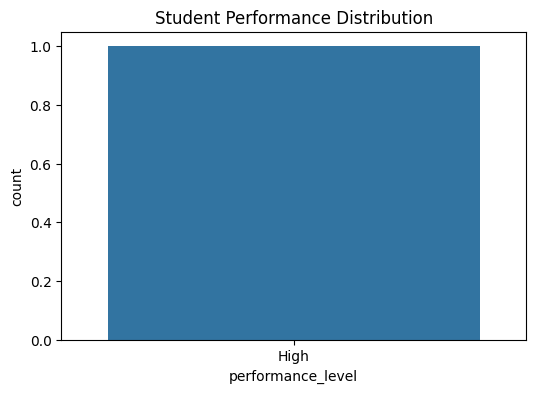

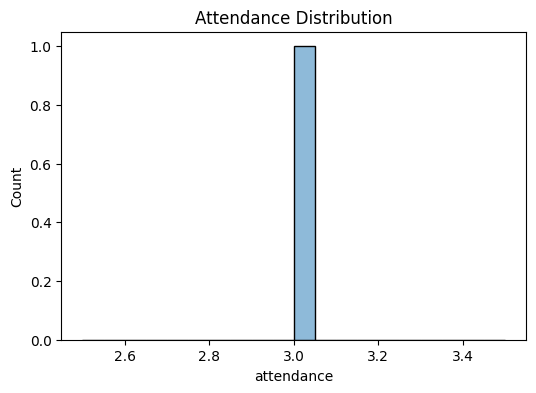

Total records used: 1

Only one sample found — trained on full data
Model training completed successfully


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# -------------------------------
# Load Dataset
# -------------------------------
print("Loading dataset...")
df = pd.read_csv("Students Performance .csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("Columns:", list(df.columns))

# -------------------------------
# Clean Attendance Column
# -------------------------------
if "attendance" not in df.columns:
    raise ValueError("❌ attendance column not found in dataset")

df["attendance"] = (
    df["attendance"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .str.strip()
)

df["attendance"] = pd.to_numeric(df["attendance"], errors="coerce")
df.dropna(subset=["attendance"], inplace=True)

print("\nAttendance cleaned successfully")

# -------------------------------
# Create Performance Level
# -------------------------------
def performance_level(att):
    if att <= 75:
        return "High"
    elif att >= 50:
        return "Medium"
    else:
        return "Low"

df["performance_level"] = df["attendance"].apply(performance_level)

# Encode target
le = LabelEncoder()
df["target"] = le.fit_transform(df["performance_level"])

# -------------------------------
# Visualization
# -------------------------------
print("\nGenerating plots...")

plt.figure(figsize=(6,4))
sns.countplot(x=df["performance_level"])
plt.title("Student Performance Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["attendance"], bins=20, kde=True)
plt.title("Attendance Distribution")
plt.show()

# -------------------------------
# Prepare Data
# -------------------------------
X = df[["attendance"]]
y = df["target"]

print(f"Total records used: {len(df)}")

# -------------------------------
# Train Model
# -------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)

if len(df) > 1:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.2f}")
else:
    model.fit(X, y)
    print("\nOnly one sample found — trained on full data")

print("Model training completed successfully")

# -------------------------------
# User Prediction
# -------------------------------
attendance_input = float(input("\nEnter student attendance percentage: "))

input_df = pd.DataFrame([[attendance_input]], columns=["attendance"])
prediction = model.predict(input_df)[0]
result = le.inverse_transform([prediction])[0]

print(f"\n🎓 Predicted Student Performance Level: {result}")

Loading dataset...
Columns found: ['student_id', 'student_age', 'sex', 'high_school_type', 'scholarship', 'additional_work', 'sports_activity', 'transportation', 'weekly_study_hours', 'attendance', 'reading', 'notes', 'listening_in_class', 'project_work', 'grade']

Attendance cleaned successfully:
112    3.0
Name: attendance, dtype: float64

Generating plots...


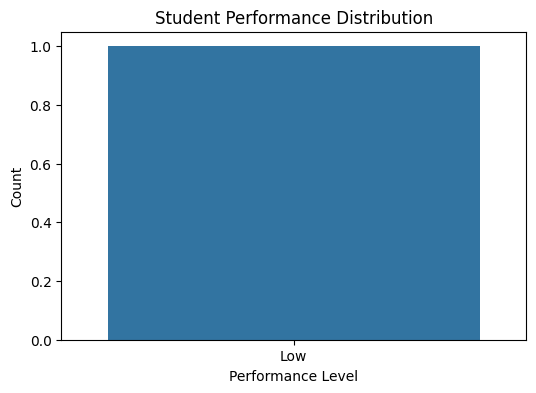

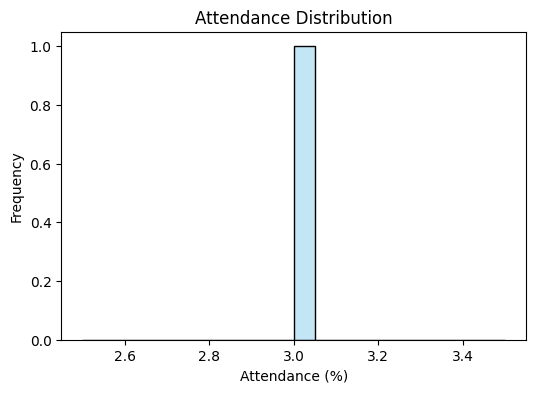


Total usable records: 1

Only one sample found — trained on full data
Model training completed successfully!

Enter student attendance percentage (e.g., 85 or 85%): 56

🎓 Predicted Student Performance Level: Low


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


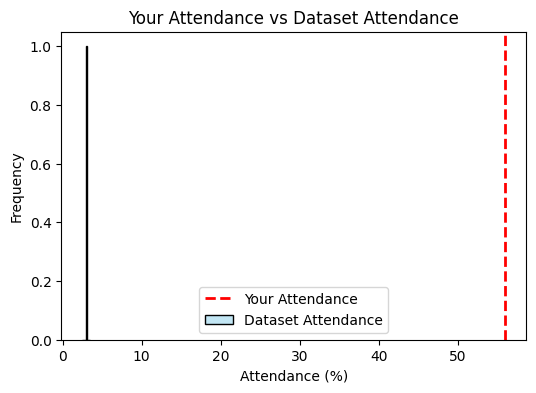

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# -------------------------------
# Load Dataset
# -------------------------------
print("Loading dataset...")
df = pd.read_csv("Students Performance .csv")  # Adjust path if needed

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("Columns found:", list(df.columns))

# -------------------------------
# Clean attendance column
# -------------------------------
if "attendance" not in df.columns:
    raise ValueError("❌ attendance column not found in dataset")

# Remove % if present and convert to numeric
df["attendance"] = df["attendance"].astype(str).str.replace("%", "").str.strip()
df["attendance"] = pd.to_numeric(df["attendance"], errors="coerce")
df.dropna(subset=["attendance"], inplace=True)

print("\nAttendance cleaned successfully:")
print(df["attendance"].head())

# -------------------------------
# Create performance level
# -------------------------------
def performance_level(att):
    if att >= 75:
        return "High"
    elif att >= 50:
        return "Medium"
    else:
        return "Low"

df["performance_level"] = df["attendance"].apply(performance_level)

# Encode target
le = LabelEncoder()
df["target"] = le.fit_transform(df["performance_level"])

# -------------------------------
# Visualizations
# -------------------------------
print("\nGenerating plots...")

plt.figure(figsize=(6,4))
sns.countplot(x=df["performance_level"])
plt.title("Student Performance Distribution")
plt.xlabel("Performance Level")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["attendance"], bins=20, kde=True, color="skyblue")
plt.title("Attendance Distribution")
plt.xlabel("Attendance (%)")
plt.ylabel("Frequency")
plt.show()

# -------------------------------
# Prepare Data for Model
# -------------------------------
X = df[["attendance"]]
y = df["target"]

print(f"\nTotal usable records: {len(df)}")

# -------------------------------
# Train Model
# -------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)

if len(df) > 1:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.2f}")
else:
    model.fit(X, y)
    print("\nOnly one sample found — trained on full data")

print("Model training completed successfully!")

# -------------------------------
# User Prediction (safe parsing)
# -------------------------------
raw_input = input("\nEnter student attendance percentage (e.g., 85 or 85%): ").strip()

# Remove % if user typed it
clean_input = raw_input.replace("%", "")

try:
    attendance_input = float(clean_input)
except ValueError:
    print("❌ Invalid input. Please enter a number like 85 or 85%")
    exit()

# Predict
prediction = model.predict([[attendance_input]])[0]
result = le.inverse_transform([prediction])[0]

print(f"\n🎓 Predicted Student Performance Level: {result}")

# -------------------------------
# Optional: Show user's attendance vs dataset
# -------------------------------
plt.figure(figsize=(6,4))
sns.histplot(df["attendance"], bins=20, kde=True, color="skyblue", label="Dataset Attendance")
plt.axvline(attendance_input, color="red", linestyle="--", linewidth=2, label="Your Attendance")
plt.title("Your Attendance vs Dataset Attendance")
plt.xlabel("Attendance (%)")
plt.ylabel("Frequency")
plt.legend()
plt.show()